In [21]:
import os 
import pandas as pd 
import seaborn as sns 
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt 
from matplotlib import colors
import numpy as np
from scipy.stats import pearsonr

datadir = '/Users/kanaaax/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/dataframes/AHBA/ahba_data/'

from matplotlib import colors
import seaborn as sns 
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt 
from matplotlib import colors


In [46]:

def return_df(fname):
    
    return pd.read_csv(os.path.join(datadir, 'stats', '%s_tstat_CP_1mm.csv'%fname), header= None)
    
pls1_STR3M_20737 = return_df('PLS1_weights_ahba20737_chi_STR3_MOTOR')
pls2_STR3M_20737 = return_df('PLS2_weights_ahba20737_chi_STR3_MOTOR')
pls3_STR3M_20737 = return_df('PLS3_weights_ahba20737_chi_STR3_MOTOR')

scores_pls1_STR3M_20737 = return_df('PLS1_scores_ahba20737_chi_STR3_MOTOR')
scores_pls2_STR3M_20737 = return_df('PLS2_scores_ahba20737_chi_STR3_MOTOR')
scores_pls3_STR3M_20737 = return_df('PLS3_scores_ahba20737_chi_STR3_MOTOR')

chi = return_df('chi_20737STR3_MOTOR')

0.64 0.0
0.44 0.0015
0.5 0.0003


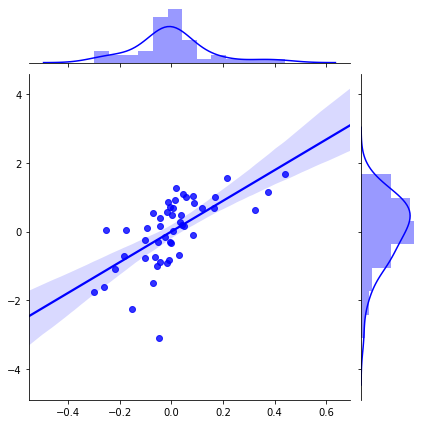

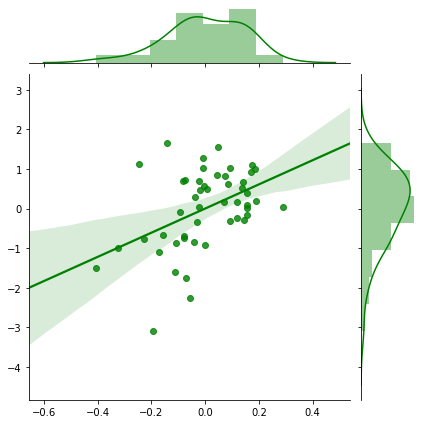

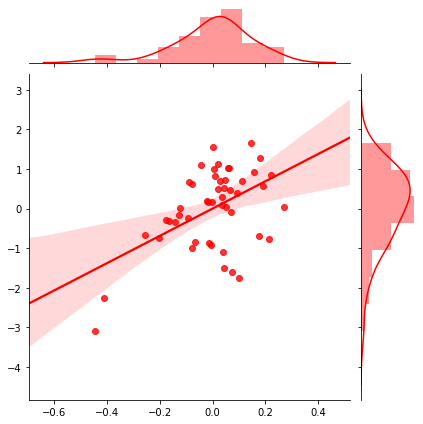

In [47]:
def make_corr(X,Y,color='b'):
    
    X = np.ravel(X)
    Y = np.ravel(Y)
    
    r_val =  np.round(pearsonr(X, Y)[0],2)
    p_val =  np.round(pearsonr(X, Y)[1],4)
    
    print(r_val, p_val)
    
    sns.jointplot(X,Y, kind="reg", color=color)

make_corr(scores_pls1_STR3M_20737, chi,color='b')
make_corr(scores_pls2_STR3M_20737, chi,color='g')
make_corr(scores_pls3_STR3M_20737, chi,color='r')

In [48]:
def plt_dist(dist, fname, colorx = 'b', ):
    fig = plt.figure(figsize=(8,6))
    ax  = fig.add_subplot(111)
    sns.despine()
    sns.set_style('white')
    g   = sns.distplot(dist, 
                      kde=0, bins = 20, 
                      color = colorx
                      )


    mu = np.mean(dist)
    sd = np.std(dist)
    x05 = np.percentile(dist, 5)
    x95 = np.percentile(dist, 95)

    plt.axvline(x05, color='r', linestyle='-.', linewidth=2)
    plt.axvline(x95, color='r', linestyle='-.', linewidth=2)

    print(mu, sd, x05,x95)
    plt.xlim(-8,8)
    #plt.yticks([0,1,2,3])
    #plt.xlim(-.8,.8)
    #plt.ylim(0,3.7)
    plt.ylabel(None)
    plt.xlabel(None)
    plt.tick_params(axis='x', pad=12)
    plt.tick_params(axis='y', pad=12)
    plt.setp(ax.spines.values(), linewidth=1.5)
    
    plt.xticks(fontsize=15, weight='bold')
    plt.yticks(fontsize=15, weight='bold')
    
    plt.savefig('/Users/kanaaax/Desktop/Brain2020/FIGS/Python/%s'%fname)
    


1.3361118292906398 1.997256646293754 -1.6990316 4.9614020000000005
0.04785468500747454 1.6008798560502793 -2.6070098 2.6608594
0.051509263056372656 1.9013985219011396 -3.1690249999999995 3.0944822000000007


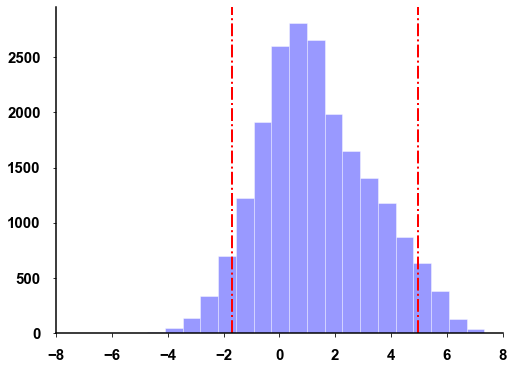

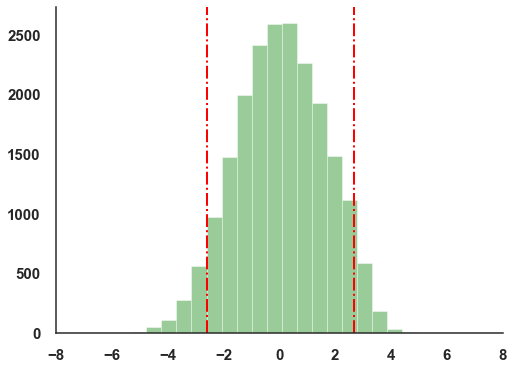

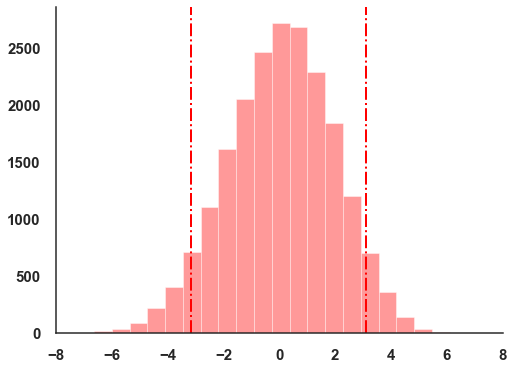

In [49]:
plt_dist(pls1_STR3M_20737[2], 'transcriptomics_ahba_20737_pls1', colorx = 'b')
plt_dist(pls2_STR3M_20737[2], 'transcriptomics_ahba_20737_pls2', colorx = 'g')
plt_dist(pls3_STR3M_20737[2], 'transcriptomics_ahba_20737_pls3', colorx = 'r')

In [50]:
def print_genes(df_pls, fname):
    
    x05 = np.percentile(df_pls[2], 5)
    x95 = np.percentile(df_pls[2], 95)
    
    
    pls_05 = [df_pls.loc[i][0] for i in df_pls.index if df_pls.loc[i][2]< np.percentile(df_pls[2], 5) ]
    pls_95 = [df_pls.loc[i][0] for i in df_pls.index if df_pls.loc[i][2]> np.percentile(df_pls[2], 95) ]

    np.savetxt('/Users/kanaaax/Desktop/PPI/%s_pctl5.txt'%fname,pls_05, fmt='%s')
    np.savetxt('/Users/kanaaax/Desktop/PPI/%s_pctl95.txt'%fname,pls_95, fmt='%s')    
    
    return pls_05, pls_95


In [51]:
pls1_STR3M_20737_pctl5, pls1_STR3M_20737_pctl95 = print_genes(pls1_STR3M_20737, 
                                                             'pls1_STR3M_20737')

pls2_STR3M_20737_pctl5, pls2_STR3M_20737_pctl95 = print_genes(pls2_STR3M_20737, 
                                                             'pls2_STR3M_20737')

pls3_STR3M_20737_pctl5, pls3_STR3M_20737_pctl95 = print_genes(pls3_STR3M_20737, 
                                                             'pls3_STR3M_20737')